<a href="https://colab.research.google.com/github/injoon-pij/pytorch-learning/blob/master/pytorch_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) ML terms

* (확실하게 아는 개념들은 굳이 정리하지 않았음)

## 1.1 Evaluating ML Model

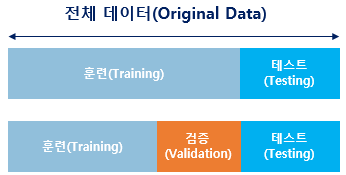

* __검증(Validation)__ : 모델 성능 조정 목적. (ex) 과적합 여부 판단, 하이퍼파라미터(초매개변수) 조정
 * __hyperparameter__ : 사용자가 지정하는 값에 따라 모델의 성능에 영향을 주는 매개변수 (ex) 학습률, 은닉층 수, 뉴런 수, 드롭아웃 비율, batch size
 * __parameter__ : 학습을 통해 바뀌어가는 매개변수 (ex) 가중치, 편향

## 1.2 Sample & Feature

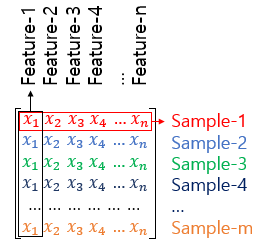

## 1.3 Confusion Matrix

| -        | 예측 참 | 예측 거짓 |
|:--------:|:-------:|:---------:|
| 실제 참  |   TP    |     FN    |
| 실제 거짓|    FP   |    TN     |

* T/F(True/False) : 정답 여부
* P/N(Positive/Negative) : 제시했던 정답

1. __Accuracy(정확도)__ =  $\frac{TP}{TP + FN + FP + TN}$
2. __Precision(정밀도)__ = $\frac{TP}{TP + FP}$ (양성이라고 대답한 전체 케이스에 대한 TP의 비율)
3. __Recall(재현율__) = $\frac{TP}{TP + FN}$ (실제값이 양성인 데이터의 전체 개수에 대해서 TP의 비율)


# 2) Perceptron

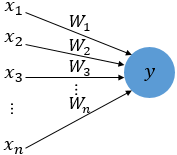

* __다수의 입력을 받아 하나의 신호를 출력__
* __실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사__

## 2.1 Activation Function

* 입력 신호를 출력 신호로 변환하는, 즉 __출력값을 변환하는 함수__
 * ex) 계단함수, 시그모이드 함수, 소프트맥스 함수, 항등 함수, ReLU...
* 은닉층의 활성화함수는 선형이 아닌 비선형이어야 함.
 * 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없기 때문
   * $f(x) = Wx$ (은닉층의 활성화함수)
   * $y(x) = f(f(f(x))) = W \text{×} W \text{×} W \text{×} x = kx$
 * 다만, 선형 함수를 사용한 은닉층을 __1회 추가한 것__과 __연속으로 추가한 것__이 차이가 없다는 뜻이지 __선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아님. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있음.__
 * 둘을 구분하기 위해 다른 표현을 사용하기도 함
   * 선형 함수를 사용한 층 = 선형층(linear layer) 또는 투사층(projection layer)
   * 활성화 함수를 사용하는 일반적인 은닉층 = 비선형층(nonlinear layer)

---

### __2.1.1 Sigmoid Function (not recommended)__


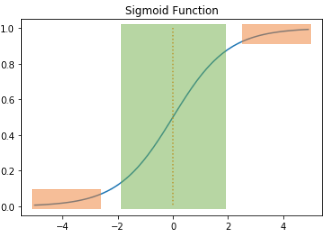

__Vanishing Gradient (기울기 소실)__
* 주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 되는데, 역전파 과정에서 시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에 0에 가까운 아주 작은 기울기가 여러번 곱해지게 되면 앞단에는 기울기가 잘 전달되지 않게 됨. 다시 말해 __매개변수가 업데이트 되지 않아 학습이 되지 않음.__
* 또한 함수가 원점 중심이 아니라(__Not zero-centered__) 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높음. 이것을 __편향 이동(bias shift)__이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 __기울기 소실 문제__가 일어날 수 있음.

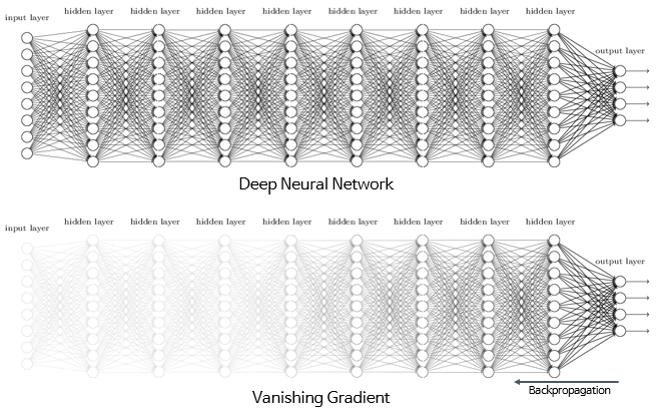

### __2.1.2 Hyperbolic tangent function__

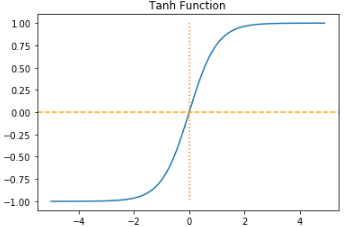

* 시그모이드 함수와 달리 0을 중심으로 한 함수
* 원점 중심(zero-centered)이기 때문에, 시그모이드 함수와 달리 편향 이동은 일어나지 않으나, 이 함수 또한 입력의 절대값이 클 경우 시그모이드 함수와 마찬가지로 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있음.

### __2.1.3 ReLU function__

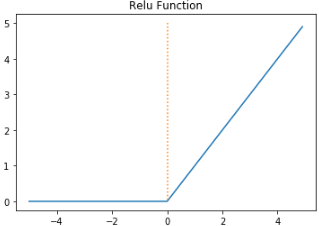

* 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동함.
* 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도 빠름
* 다만, 입력값이 음수면 출력값과 기울기도 0이 되어 해당 뉴런은 다시 회생하기 어려운 __dying ReLU(dead neuron)__가 됨. 
  * 이 현상은 때로는 regularization(규제)의 기능을 하여, 마치 drop-out처럼 overfitting을 방지해주기도 함.

### __2.1.4 Leaky ReLU function__

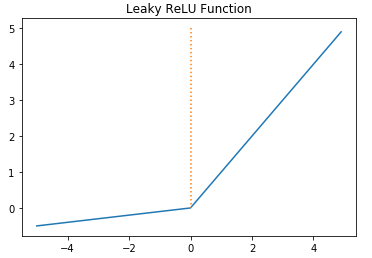

* $f(x) = max(ax, x)$
* 0 이하의 입력에 대해 $a$만큼 곱해줌으로써 dying ReLU를 보완 (일반적으로 0.01)

### __2.1.5 PReLU function (Parametric ReLU)__

* Leaky ReLU와 식은 동일하나, LeakyReLU에서 하이퍼파라미터(초매개변수)인 ​$a$를 가중치 매개변수와 마찬가지로 ​학습되도록 하여 값이 변경되는 매개변수로 둠.

### __2.1.6 Softmax Function (Classification)__

* 은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 아예 사용되지 않는다는 것은  아님.
* 주로 분류(classification) 문제에서 출력층 뉴런에 적용하여 사용.

## 2.2 Single-Layer Perceptron

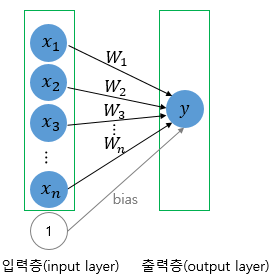

* __단층 퍼셉트론은 선형 영역에 대해서만 분리가 가능 (비선형 분리 X)__

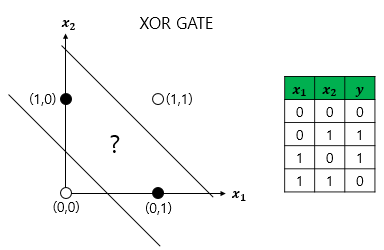

## 2.3 MultiLayer Perceptron(MLP)

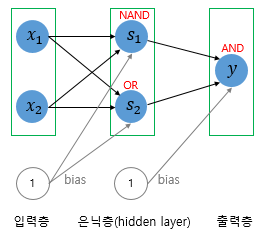

* 단충 퍼셉트론과 달리 입력층과 출력층 사이에 은닉층 존재
* 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 함.
 * 심층 신경망(Deep Neural Network)을 학습시킴 => Deep Learning

# 3) Backpropagation

* 인공 신경망이 순전파 과정을 진행하여 예측값과 실제값 간의 오차를 구한 뒤, 계산한 오차에 대한 각각의 가중치 매개변수들의 기울기를 계산하는 과정.
* 미분의 연쇄법칙 (Chain Rule)로 각각의 매개변수들의 gradient를 계산할 수 있음

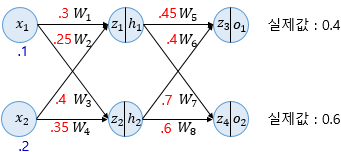

$\frac{\text{∂}E_{total}}{\text{∂}W_{5}} = \frac{\text{∂}E_{total}}{\text{∂}o_{1}} \text{×} \frac{\text{∂}o_{1}}{\text{∂}z_{3}} \text{×} \frac{\text{∂}z_{3}}{\text{∂}W_{5}} \text{→} W_{5}^{+}=0.43703857$

$\frac{\text{∂}E_{total}}{\text{∂}W_{6}} = \frac{\text{∂}E_{total}}{\text{∂}o_{1}} \text{×} \frac{\text{∂}o_{1}}{\text{∂}z_{3}} \text{×} \frac{\text{∂}z_{3}}{\text{∂}W_{6}} \text{→} W_{6}^{+}=0.38685205$

$\frac{\text{∂}E_{total}}{\text{∂}W_{7}} = \frac{\text{∂}E_{total}}{\text{∂}o_{2}} \text{×} \frac{\text{∂}o_{2}}{\text{∂}z_{4}} \text{×} \frac{\text{∂}z_{4}}{\text{∂}W_{7}} \text{→} W_{7}^{+}=0.69629578$

$\frac{\text{∂}E_{total}}{\text{∂}W_{8}} = \frac{\text{∂}E_{total}}{\text{∂}o_{2}} \text{×} \frac{\text{∂}o_{2}}{\text{∂}z_{4}} \text{×} \frac{\text{∂}z_{4}}{\text{∂}W_{8}} \text{→} W_{8}^{+}=0.59624247$

# 4) Digit Image Data Classification by MLP

## 4.1 Data Load

숫자 필기 데이터
* scikit-learn에서 제공하는 분류용 예제 데이터
* 0 ~ 9까지의 숫자를 손으로 쓴 이미지 데이터
* 데이터 개수 : 1797개
* 이미지 픽셀 수 : 8 x 8 = 64개
* 각 픽셀의 레이블 범위(명암) : 0 ~ 15
* ```from sklearn.datasets import load_digits```

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0]) # 해당 이미지 데이터를 행렬로 출력 (8, 8)
print(digits.target[0]) # 해당 이미지 데이터의 레이블
print(digits.data[0]) # 해당 이미지 데이터를 벡터로 출력 (64,)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지 데이터
Y = digits.target # 이미지 레이블

## 4.2 MLP Classifier Modeling

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
# 층 쌓기
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer2 = 16, output_layer = 10
)

In [ ]:
# 데이터를 torch 형식으로
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

# cost function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(model.parameters())

# 손실함수 값 저장
losses = []

# train
for epoch in range(101):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost {:.6f}'.format(
        epoch, 100, loss.item()
    ))

  losses.append(loss.item())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch    0/100 Cost 0.335292
Epoch   10/100 Cost 0.237514
Epoch   20/100 Cost 0.170255
Epoch   30/100 Cost 0.124096
Epoch   40/100 Cost 0.092767
Epoch   50/100 Cost 0.071814
Epoch   60/100 Cost 0.057100
Epoch   70/100 Cost 0.046209
Epoch   80/100 Cost 0.037926
Epoch   90/100 Cost 0.031448
Epoch  100/100 Cost 0.026339


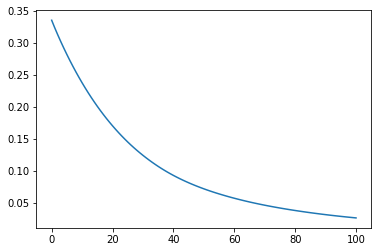

In [ ]:
# 손실함수 값 감소 추이
plt.plot(losses)

# 5) MNIST Data Classification by MLP

## 5.1 Data Load

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [ ]:
print(mnist.data[0]) # 이미지 데이터
print(mnist.target[0]) # 이미지 레이블

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
mnist.target = mnist.target.astype(np.int8)
X = mnist.data / 255 # 0 ~ 255값을 [0,1] 구간으로 normalization
y = mnist.target

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# 데이터를 train data와 test data로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/7, random_state = 0) # random_state로 시드 지정

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# train data & test data 각각 Dataset 형태로
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 5.2 MLP Classifier Modeling

In [ ]:
from torch import nn

# module.add_module 방식으로 층 쌓기
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

# cost function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.01)

__함수를 정의하여 train과 test 진행__

In [ ]:
def train(epoch):
  model.train() # 신경망 모델을 학습 모드로 전환

  # Dataloader에서 미니배치를 하나씩 가져와 학습
  for data, targets in loader_train:
    optimizer.zero_grad()

    outputs = model(data) # forward

    loss = loss_fn(outputs, targets)
    loss.backward() # backward

    optimizer.step()

  print("epoch {} : 완료\n".format(epoch))

In [ ]:
def test():
  model.eval() # 신경망 모델을 추론 모드로 전환
  correct = 0

  # Dataloader에서 미니배치를 하나씩 가져와 추론
  with torch.no_grad(): # 추론 과정에서는 미분 필요 없음
    for data, targets in loader_test:
      outputs = model(data) # forward
      # outputs.shape = (64, 10)

      # 확률이 가장 높은 레이블 계산
      _, predicted = torch.max(outputs.data, dim = 1)
      # predicted.shape = (64,)

      # 정답(targets)과 일치한 경우 정답 카운트 증가
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
      # torch.eq : 각 요소를 비교하여 같으면 True, 다르면 False 반환

  data_num = len(loader_test.dataset)
  print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(
      correct, data_num, 100. * correct / data_num
  ))

In [ ]:
test()


테스트 데이터에서 예측 정확도: 964/10000 (10%)



In [ ]:
# 3에폭 train 수행
for epoch in range(3):
  train(epoch)

test()

epoch 0 : 완료

epoch 1 : 완료

epoch 2 : 완료


테스트 데이터에서 예측 정확도: 9506/10000 (95%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


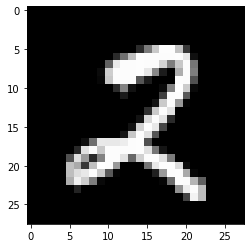

In [ ]:
# train한 model로 한 개의 예제 데이터 추론
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy() # numpy로 변환
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

# 6) Some techniques for Neural Network Model

## 6.1 How to avoid overfitting

* 데이터의 양을 늘리기
* 모델 복잡도 줄이기 (은닉층의 수, 매개변수의 수 등을 줄이기)
* 가중치 규제 (Regularization) 적용
* 드롭아웃 (Dropout)

### 6.1.1 Weight Regularization

* L1 regularization : 가중치 w들의 절댓값 합계(L1 norm)를 비용 함수에 추가
* L2 regularization : 가중치 w들의 제곱합(L2 norm)을 비용 함수에 추가

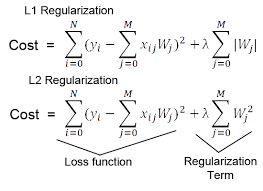

[규제 원리]
* __손실함수에 제약조건(penalty)을 더함으로써, 비용함수 값이 최소가 되려면 손실함수 값뿐만 아니라 더해진 규제항 또한 최소로 만들어야 한다__
* λ값에 따라 규제의 강도가 달라진다(hyperparameter)
 * λ값이 큼 : 비용함수의 값에 미치는 규제항의 영향이 손실함수의 영향보다 커지므로, 모델이 훈련을 통해서 __규제항의 값을 작게 만드는 매개변수를 찾는 것을 우선시__
 * λ값이 작음 : 비용함수의 값에 미치는 규제항의 영향이 손실함수의 영향보다 작아지므로, 모델이 훈련을 통해서 __손실함수의 값을 작게 만드는 매개변수들을 찾는 것을 우선시__
* 규제의 강도를 적절하게 조정하여 제약조건을 통해 일반화된 모형을 찾음 (과대적합 또는 과소적합 방지) 

[Regularization 별 특징]
* __L1 regularization__
 * 이 규제를 사용한 모델을 __Lasso regression model__이라고 함
 * 불필요한 가중치들을 0으로 만들어 학습에 중요한 영향을 주고 있는 특정 가중치가 무엇인지 판단하는 데에 도움
 * 가중치의 수가 매우 많고 대부분의 값이 0인 (sparse) 모델에서 변수선택(feature selection) 효과를 줄 수 있음

* __L2 regularization__
 * 이 규제를 사용한 모델을 __Ridge regression model__이라고 함
 * 가중치를 완전히 0으로 만들지는 않으므로 가중치 매개변수 간 상관관계가 있을 경우 유용함
 * 크기가 아주 큰 outlier 가중치를 줄여주는 기능을 하여 weigt decay(가중치 감쇠)라고 하기도 함
 * pytorch에서는 optimzier에 weigth_decay 매개변수를 설정하여 규제 적용 가능
   * ```optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)```

* __Elastic Net__
 * L1 규제와 L2 규제를 모두 사용함

### 6.1.2 Dropout

* 학습 과정마다 랜덤으로 드롭아웃의 비율만큼의 신경망의 뉴런을 사용하지 않는 방법
* 신경망 학습 시에만 사용(예측 시에는 일반적으로 사용 X)
* 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해줌.
* 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 냄.

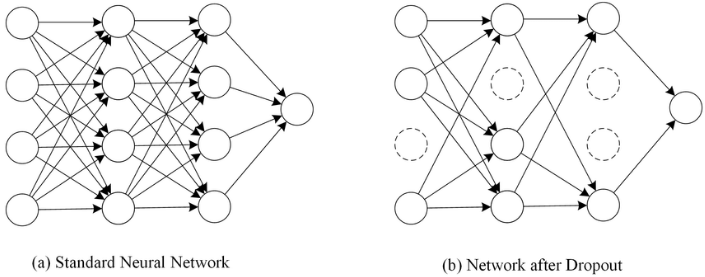

## 6.2 How to avoid Gradient Vanishing/Exploding

* 은닉층의 활성화 함수로 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용
 * 입력값에 대한 기울기가 0으로 수렴하지 않기 때문
* 가중치 초기화 (Weight initialization)
* 배치 정규화 (Batch Normalization)
* 층 정규화 (Layer Normalization)

### 6.2.1 Weight Initialization

__[가중치 초기값을 잘못 설정했을 경우 발생하는 문제 상황]__
* 가중치 초기값이 모두 0이거나 모두 동일한 경우
 * 가중치를 모두 동일한 값으로 설정하면 다음 층의 뉴런으로 모두 같은 출력값을 내보내게 됨. 즉, 가중치를 여러 개 가지고 층을 깊게 쌓는 의미가 상쇄됨. (신경망의 표현력이 저하됨)
 * 또한 다음 층 뉴런에 모두 같은 값이 입력된다는 것은 역전파 단계에서 해당 층의 가중치들이 모두 똑같은 값으로 갱신되어 학습이 제대로 되지 않게 됨.


* 가중치 초기값이 평균이 0, 표준편차가 1인 정규분포로 생성된 경우
 * 은닉층의 활성화함수로는 sigmoid 함수 사용
 * 층이 깊어질수록 은닉층의 출력값이 0과 1로 가까워짐에 따라 역전파의 기울기값이 0에 가까워지다가 결국 기울기 소실 문제 발생 

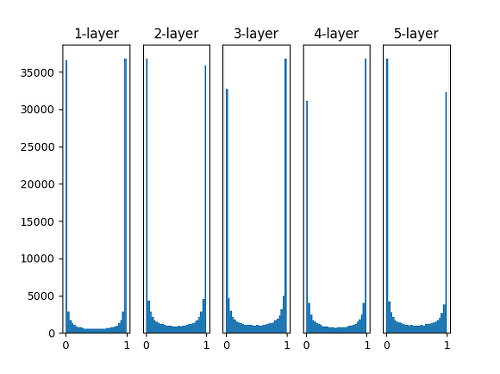

* 가중치 초기값이 평균이 0, 표준편차가 0.01인 정규분포로 생성된 경우
 * 은닉층의 활성화함수로는 sigmoid 함수 사용
 * 층이 깊어질수록 은닉층의 출력값이 0.5로 집중됨에 따라 출력값들의 표현력이 제한되고 학습이 잘 이루어지지 않음. 즉 아무리 많은 뉴런이 있다고 하더라도 모두 같은 값을 출력한다면 뉴런 하나의 역할과 다르지 않음
 * 또한 대부분 뉴런의 출력값이 동일하므로 가중치를 모두 같은 값으로 초기화한 상황일 때와 같이 역전파 단계에서 가중치들이 모두 똑같은 값으로 갱신되는 문제도 발생

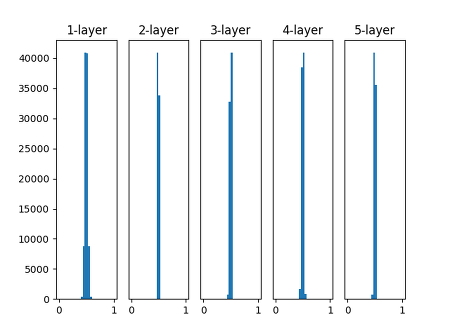

따라서 위와 같은 문제가 발생하지 않고 학습이 효율적으로 이루어지려면 __은닉층의 활성화값들이 특정값으로 치우친 형태가 아닌 고르게 분포된 형태__여야 함 

__1. Xavier Initialization__
* 균등 분포를 사용하여 초기화
 * $W \sim Uniform(-\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }}, +\sqrt{\frac{6}{ {n}_{in} + {n}_{out} }})$
* 정규 분포를 사용하여 초기화
 * $W \sim N(0,\sqrt{\frac { 2 }{ { n }_{ in }+{ n }_{ out } } })$
* ${n}_{in}$은 이전 층 뉴런의 개수, ${n}_{out}$은 다음 층 뉴런의 개수
* 활성화함수가 sigmoid, tanh인 경우에는 좋은 성능을 보이나 ReLU와 함께 사용할 경우에는 X

__2. He Initialization__
* 균등 분포를 사용하여 초기화
 * $W \sim Uniform(-\sqrt{\frac{6}{ {n}_{in} }}, +\sqrt{\frac{6}{ {n}_{in} }})$
* 정규 분포를 사용하여 초기화
 * $W \sim N(0,\sqrt{\frac { 2 }{ { n }_{ in } } })$
* ${n}_{in}$은 이전 층 뉴런의 개수
* 활성화함수가 ReLU 계열인 경우 좋은 성능

### 6.2.2 Batch Normalization

* 각 층의 활성화값이 특정값에 치우치지 않고 고르게 분포되도록, 활성화함수를 통과하기 전에 출력값들을 정규분포로 미니배치 단위로 정규화(Normalization)시켜 고른 활성화값 분포를 강제하여 학습의 효율성을 높임 
* 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생하는 __내부 공변량 변화__가 기울기 소실/폭주 등 신경망 모델의 불안정성의 원인이 됨
 * cf. 공변량 변화 : 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우
 * cf. 내부 공변량 변화 : 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화

__[수식]__

입력값 : 미니배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$

출력값 : $y^{(i)} = BN_{\text{γ}, \text{β}}(x^{(i)})$

미니배치 $B$에 대한 평균 : $\text{μ}_{B} \text{←} \frac{1}{m} \sum_{i=1}^{m} x^{(i)}$

미니배치 $B$에 대한 분산 : $\text{σ}^{2}_{B} \text{←} \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \text{μ}_{B})^{2}$

* normalization : $\hat{x}^{(i)} \text{←} \frac{x^{(i)} - \text{μ}_{B}}{\sqrt{\text{σ}^{2}_{B}+\text{ε}}}$
 * $\text{ε}$는 분모가 0이 되는 것을 막기 위해 더해짐

* scaling & shift : $y^{(i)} \text{←} \text{γ}\hat{x}^{(i)} + \text{β} = BN_{\text{γ}, \text{β}}(x^{(i)})$
 * 입력 데이터에 대해 정규화를 하면, $\hat{x}^{(i)}$의 값이 대부분 0에 가까운 값이 되어 만약 sigmoid 활성화함수의 입력값으로 들어가게 되면 활성화함수가 선형구간에 빠지게 됨 (sigmoid 함수는 0 부근에서 선형성을 띰)
 * $\text{γ}$ 와 $\text{β}$는 학습과정에서 역전파에 의해 조정되는 매개변수

테스트 단계(추론 단계처럼 데이터가 하나씩 주입된다고 가정)나 추론 단계에서는 평균과 표준편차를 계산할 미니배치가 없기 때문에 전체 Training Set의 평균과 표준편차을 사용. 단, 전체 Training Set에 대한 평균과 표준편차을 계산하는 것은 무리일 수 있으므로 학습 과정에서 구한 n개의 미니배치들에 대한 평균과 표준편차으로 대신함.

* n개의 미니배치들에 대한 평균 : $\hat{\text{μ}} \text{←} \frac{1}{n} \sum_{i=1}^{n} \text{μ}_{B}^{(i)}$
* n개의 미니배치들에 대한 표준편차 : $\hat{\text{σ}} \text{←} \frac{1}{n} \sum_{i=1}^{n} \text{σ}_{B}^{(i)}$


__[효과]__
* 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 __기울기 소실 문제가 크게 개선됨__
* 가중치 초기값에 크게 의존하지 않기 때문에 __가중치 초기화에 훨씬 덜 민감해짐__
* 훨씬 큰 학습률을 사용할 수 있어 __학습 속도를 개선시킴__
* 미니 배치마다 평균과 표준편차를 계산하므로 __훈련 데이터에 일종의 잡음을 넣는 부수 효과로 overfitting을 방지하는 효과__를 내기도 함. 단, 부수적 효과이므로 dropout과 함께 사용하는 것이 좋음.

__[한계]__
* 미니 배치 크기에 의존적임. 크기가 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있음.
* RNN에 적용하기 어려움

### 6.2.3 Layer Normalization

* 층 정규화 시각화

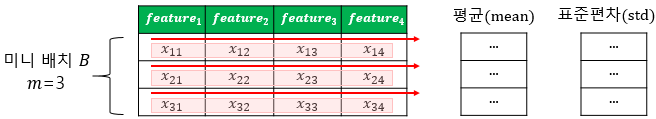

* 미니배치 크기에 영향을 덜 받음

* RNN에도 적용하기 수월함

---

* 배치 정규화 시각화 (비교용)

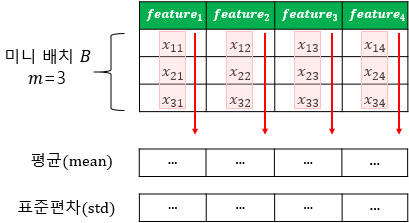